In [2]:
# Step 1: Load the dataset and display a sample
import pandas as pd

# Load the Core PCOS Dataset
core_pcos_df = pd.read_csv("Core_PCOS_Dataset_Cleaned.csv")

# Display a sample of the raw dataset before preprocessing
print("Raw Core PCOS Dataset Sample:")
print(core_pcos_df.head())


Raw Core PCOS Dataset Sample:
   Sl. No  Patient File No.  PCOS (Y/N)   Age (yrs)  Weight (Kg)  Height(Cm)   \
0       1                 1           0        28.0         44.6        152.0   
1       2                 2           0        36.0         65.0        161.5   
2       3                 3           1        33.0         68.8        165.0   
3       4                 4           0        37.0         65.0        148.0   
4       5                 5           0        25.0         52.0        161.0   

    BMI  Blood Group  Pulse rate(bpm)   RR (breaths/min)  ...  Pimples(Y/N)  \
0  19.3         15.0              78.0              22.0  ...           0.0   
1  24.9         15.0              74.0              20.0  ...           0.0   
2  25.3         11.0              72.0              18.0  ...           1.0   
3  29.7         13.0              72.0              20.0  ...           0.0   
4  20.1         11.0              72.0              18.0  ...           0.0   

   Fast 

In [12]:
# Step 2

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Clean column names to remove hidden whitespace
core_pcos_df.columns = core_pcos_df.columns.str.strip()

# Define feature columns and target variable
selected_features = [
    "Age (yrs)", "BMI", "hair growth(Y/N)", "Hair loss(Y/N)", "Pimples(Y/N)",
    "Fast food (Y/N)", "Reg.Exercise(Y/N)"
]
target_column = "PCOS (Y/N)"

# Select data
X = core_pcos_df[selected_features].copy()
y = core_pcos_df[target_column].astype(int)

# Drop rows with missing values
X = X.dropna()
y = y.loc[X.index]

# Normalize numeric features for Logistic Regression
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Convert scaled arrays back to DataFrames for display
X_scaled_df = pd.DataFrame(X_scaled, columns=selected_features)
X_train_df = pd.DataFrame(X_train, columns=selected_features)
X_test_df = pd.DataFrame(X_test, columns=selected_features)
y_train_df = pd.DataFrame(y_train).reset_index(drop=True)
y_test_df = pd.DataFrame(y_test).reset_index(drop=True)

# Add target to show full cleaned dataset
cleaned_df = X_scaled_df.copy()
cleaned_df["PCOS (Y/N)"] = y.values

# Create labeled samples of train/test sets
train_data_sample = pd.concat([X_train_df.reset_index(drop=True), y_train_df], axis=1)
test_data_sample = pd.concat([X_test_df.reset_index(drop=True), y_test_df], axis=1)

# Display samples
print("Cleaned and Scaled Dataset Sample:")
print(cleaned_df.head(25).to_string(index=False))

# Display the shapes of the training and testing sets
print("\nTraining Set Shape:", X_train.shape, y_train.shape)
print("Testing Set Shape:", X_test.shape, y_test.shape)

print("\nTraining Data Sample:")
print(train_data_sample.head(15).to_string(index=False))

print("\nTesting Data Sample:")
print(test_data_sample.head(15).to_string(index=False))


Cleaned and Scaled Dataset Sample:
 Age (yrs)      BMI  hair growth(Y/N)  Hair loss(Y/N)  Pimples(Y/N)  Fast food (Y/N)  Reg.Exercise(Y/N)  PCOS (Y/N)
  0.285714 0.260377               0.0             0.0           0.0              1.0                0.0           0
  0.571429 0.471698               0.0             0.0           0.0              0.0                0.0           0
  0.464286 0.486792               0.0             1.0           1.0              1.0                0.0           1
  0.607143 0.652830               0.0             0.0           0.0              0.0                0.0           0
  0.178571 0.290566               0.0             1.0           0.0              0.0                0.0           0
  0.571429 0.558491               0.0             1.0           0.0              0.0                0.0           0
  0.500000 0.524528               0.0             0.0           0.0              0.0                0.0           0
  0.464286 0.403774               0.0

In [10]:
# Step 3: Train and Evaluate Logistic Regression vs Multinomial Naïve Bayes

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

# Logistic Regression
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
acc_log = accuracy_score(y_test, y_pred_log)
cm_log = confusion_matrix(y_test, y_pred_log)

# Multinomial Naïve Bayes
mnb_model = MultinomialNB()
mnb_model.fit(X_train, y_train)
y_pred_mnb = mnb_model.predict(X_test)
acc_mnb = accuracy_score(y_test, y_pred_mnb)
cm_mnb = confusion_matrix(y_test, y_pred_mnb)

# Step 3 (Expanded): Print Regression Results and Confusion Matrices Clearly

# Format and print results for Logistic Regression
print("Logistic Regression Results")
print(f"Accuracy: {acc_log:.2f}")
print("Confusion Matrix:")
print(cm_log)

# Format and print results for Multinomial Naïve Bayes
print("\nMultinomial Naïve Bayes Results")
print(f"Accuracy: {acc_mnb:.2f}")
print("Confusion Matrix:")
print(cm_mnb)



Logistic Regression Results
Accuracy: 0.76
Confusion Matrix:
[[140   8]
 [ 44  25]]

Multinomial Naïve Bayes Results
Accuracy: 0.75
Confusion Matrix:
[[141   7]
 [ 48  21]]


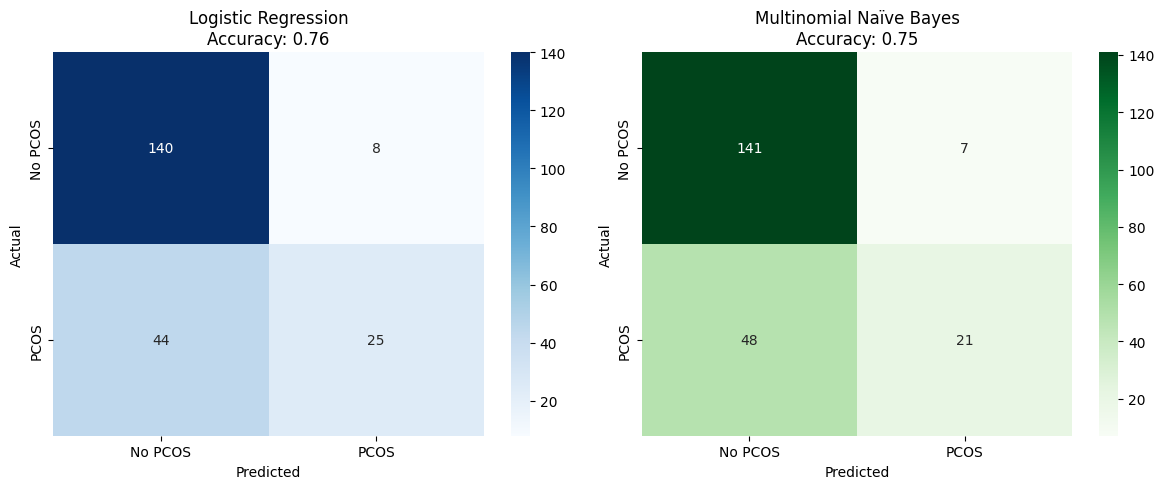

In [6]:
# Step 4: Visualizing the Confusion Matrices for Both Models

import matplotlib.pyplot as plt
import seaborn as sns

# Plot side-by-side confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Logistic Regression
sns.heatmap(cm_log, annot=True, fmt="d", cmap="Blues", ax=axes[0],
            xticklabels=["No PCOS", "PCOS"], yticklabels=["No PCOS", "PCOS"])
axes[0].set_title(f"Logistic Regression\nAccuracy: {acc_log:.2f}")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# Multinomial Naïve Bayes
sns.heatmap(cm_mnb, annot=True, fmt="d", cmap="Greens", ax=axes[1],
            xticklabels=["No PCOS", "PCOS"], yticklabels=["No PCOS", "PCOS"])
axes[1].set_title(f"Multinomial Naïve Bayes\nAccuracy: {acc_mnb:.2f}")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()
